# HydroHomies Plots
In this notebook, the plots, figures and also some explanations or details about each of them are being presented.  

To clarify plots, please follow this order:
- Title for each plot is mandatory
- Analysis must be written 
- legends are manedatory

### Loading all data


In [1]:
import yaml
import pandas as pd
with open('config.yaml') as stream:
    config = yaml.safe_load(stream)

### Cleaning (Digit Span Raw Data)

In [2]:
def clean_digit_span(raw_df):
    # Select the sequence length data from the raw data and create a dataframe
    seq_length_df = raw_df[raw_df[1].astype(str).str.match(r'\d+')]

    # Get the value of the longest sequence remembered
    longest = seq_length_df[2]
    longest = longest.tolist()

    # Get the number of errors made
    error_number = seq_length_df[3]
    error_number = error_number.tolist()

    # Select the rows with the click stimulus data
    click_stim_df = raw_df[raw_df[1]=='clickedStim']
    click_stim_df.size

    # Calculate the number of clicks made by the participant
    clicks_observed = click_stim_df.count(axis=1) - 2 
    clicks_observed = clicks_observed.tolist()

    # Calculate the number of clicks that the participant should have made
    clicks_expected =  pd.to_numeric(longest) + 1
    clicks_expected = clicks_expected.tolist()

    # Create a new dataframe with all the values calculated above
    clean_data = pd.DataFrame(data ={'seq length':longest,
                        'errors': error_number,
                        'clicks expected': clicks_expected,
                        'clicks observed':clicks_observed})

    # Return the new dataframe
    return clean_data


### Data Integration For Each Test

In [3]:
def create_merged_df(config_dict):
    data_dict = {}

    # read the files 
    for test, file in config_dict.items():
        df_dict = pd.read_excel(file, sheet_name=None, header=None)

        for session, df in df_dict.items():

            # extracting the participant name and type name
            participant = test.split('_')[-1]
            test_name = test.split('_')[0]

            #extracting repeat number and making its column except for personal
            try:
                type, repeat = session.split('_')
                df.insert(0, 'repeat', repeat)

            except ValueError:
                type = session


            #cleaning digit_span row data
            if test_name == 'digit':
                df = clean_digit_span(df.iloc[3:])
            
            # verbal fluency test contains header
            elif test_name =='verbal':
                df = df.iloc[1:]

            # inserting the type and participant columns
            df.insert(0, 'type', type)
            df.insert(0, 'participant', participant)
 
            # concatenating data frames of each test
            if test_name not in data_dict:
                data_dict[test_name] = df
            else:
                data_dict[test_name] = pd.concat([data_dict[test_name], df])
    
    return data_dict

In [4]:
# Run the function
df_dict = create_merged_df(config)

   participant     type        0           1                2  \
0         blue  control  session  time (min)  heartrate (bpm)   
1         blue  control        1           0                s   
2         blue  control        1           5               92   
3         blue  control        1          10              157   
4         blue  control        1          15              166   
5         blue  control        1          20              167   
6         blue  control        1          25              170   
7         blue  control        1          30              172   
8         blue  control        1          35              168   
9         blue  control        1          40              141   
10        blue  control        2           0               90   
11        blue  control        2           5              130   
12        blue  control        2          10              145   
13        blue  control        2          15              160   
14        blue  control  

---

### Flanker Test Analysis

   participant     type        0           1                2  \
0         blue  control  session  time (min)  heartrate (bpm)   
1         blue  control        1           0                s   
2         blue  control        1           5               92   
3         blue  control        1          10              157   
4         blue  control        1          15              166   
5         blue  control        1          20              167   
6         blue  control        1          25              170   
7         blue  control        1          30              172   
8         blue  control        1          35              168   
9         blue  control        1          40              141   
10        blue  control        2           0               90   
11        blue  control        2           5              130   
12        blue  control        2          10              145   
13        blue  control        2          15              160   
14        blue  control  

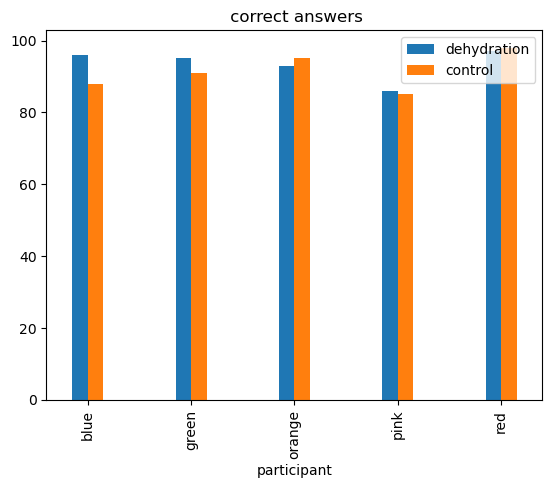

In [6]:
import matplotlib
# matplotlib.style.use('ggplot')

def flanker_test(flanker_df): # Roya
    flanker_df.rename(columns={0:"pattern", 1:"expression", 2:"correctness", 3:"response-time"}, inplace=True)
    flanker_df["correctness"] = flanker_df["correctness"].replace(1, "correct")
    flanker_df["correctness"] = flanker_df["correctness"].replace(2, "incorrect")
    flanker_df["correctness"] = flanker_df["correctness"].replace(3, "not-answer")
    flanker_df = flanker_df[flanker_df["correctness"] == "correct"]
    
    df = flanker_df.groupby(["participant", "type"])["correctness"].value_counts()


    dehydration = flanker_df[flanker_df["type"] == "dehydration"]
    control = flanker_df[flanker_df["type"] == "control"]
    dehydration = dehydration.groupby(["participant"])["correctness"].count().rename("dehydration").to_frame()
    control = control.groupby(["participant"])["correctness"].count().rename("control").to_frame()
    df = dehydration.join(control)
    df.plot(kind="bar", width=0.3, title=" correct answers")

data_dict = create_merged_df(config)
# print(data_dict["flanker"])
# data_dict["flanker"].to_csv("data.csv")
flanker_test(data_dict["flanker"])

### Stroop Test  Analysis

In [ ]:
def stroop_test(stroop_df): # Mahdiye
    pass

### Stop Signal Analysis

In [ ]:
def stop_test(stop_df): # Jacob
    pass

### Verbal Fluency Analysis

In [ ]:
def verbal_test(verbal_df): # Jacob
    pass

### Digit Span Analysis

In [ ]:
# def digit_test(digit_df): # Karina
#     pass
df_dict["digit"]

---